# Importing Libraries

In [48]:
import pandas as pd
import numpy as np
import os,sys
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [49]:
df=pd.read_csv("Final_data.csv")
df

,Person,Wav file,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,spread1,spread2,D2,PPE,language
0,phon_R01_S01,1,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,...,0.065450,0.022110,21.033000,1,4.147830e-01,-4.813031,0.266482,2.301442,0.284654,English
1,phon_R01_S01,2,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,...,0.094030,0.019290,19.085000,1,4.583590e-01,-4.075192,0.335590,2.486855,0.368674,English
2,phon_R01_S01,3,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,...,0.082700,0.013090,20.651000,1,4.298950e-01,-4.443179,0.311173,2.342259,0.332634,English
3,phon_R01_S01,4,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,...,0.087710,0.013530,20.644000,1,4.349690e-01,-4.117501,0.334147,2.405554,0.368975,English
4,phon_R01_S01,5,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,...,0.104700,0.017670,19.649000,1,4.173560e-01,-3.747787,0.234513,2.332180,0.410335,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,Giovanni N,FB1GNIEOGVL47M100220171227.wav,109.480629,169.344661,75.000000,18.529456,4.851695,4.851695,6.338581,0.000459,...,0.004924,3.613740,0.276722,1,-1.442695e-10,20.681959,45.920800,0.238455,0.012165,Italian
974,Giovanni N,VE1GNIEOGVL47M100220171217.wav,117.583634,124.685684,104.243866,1.874697,0.387523,0.387523,0.500678,0.002283,...,0.021001,2.524645,0.396095,1,-1.442695e-10,1.328195,2.862934,0.032206,0.000000,Italian
975,Giovanni N,VE2GNIEOGVL47M100220171217.wav,117.149051,120.438432,114.999626,0.984730,0.356262,0.356262,0.542042,0.002757,...,0.026160,2.384145,0.419438,1,-1.442695e-10,1.532805,2.832705,0.919261,0.000000,Italian
976,Giovanni N,VU1GNIEOGVL47M100220171224.wav,115.155070,132.099881,107.920019,1.632779,0.411457,0.411457,0.491512,0.000582,...,0.019963,1.997651,0.500588,1,-1.442695e-10,1.385324,2.844660,0.045541,0.000000,Italian


# Renaming columns

In [50]:
df.rename(columns=({'Person':'name','Wav file':'Audio file','MDVP:Fo(Hz)':'avg_fre', 'MDVP:Fhi(Hz)':'max_fre', 'MDVP:Flo(Hz)':'min_fre', 'MDVP:Jitter(%)':'var_fre1',
       'MDVP:Jitter(Abs)':'var_fre2', 'MDVP:RAP':'var_fre3', 'MDVP:PPQ':'var_fre4', 'Jitter:DDP':'var_fre5',
       'MDVP:Shimmer':'var_amp1', 'MDVP:Shimmer (dB)':'var_amp2', 'Shimmer:APQ3':'var_amp3', 'Shimmer:APQ5':'var_amp4',
       'MDVP:APQ':'var_amp5', 'Shimmer:DDA':'var_amp6'}),inplace=True)
df

,name,Audio file,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,...,var_amp6,NHR,HNR,status,RPDE,spread1,spread2,D2,PPE,language
0,phon_R01_S01,1,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,...,0.065450,0.022110,21.033000,1,4.147830e-01,-4.813031,0.266482,2.301442,0.284654,English
1,phon_R01_S01,2,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,...,0.094030,0.019290,19.085000,1,4.583590e-01,-4.075192,0.335590,2.486855,0.368674,English
2,phon_R01_S01,3,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,...,0.082700,0.013090,20.651000,1,4.298950e-01,-4.443179,0.311173,2.342259,0.332634,English
3,phon_R01_S01,4,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,...,0.087710,0.013530,20.644000,1,4.349690e-01,-4.117501,0.334147,2.405554,0.368975,English
4,phon_R01_S01,5,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,...,0.104700,0.017670,19.649000,1,4.173560e-01,-3.747787,0.234513,2.332180,0.410335,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,Giovanni N,FB1GNIEOGVL47M100220171227.wav,109.480629,169.344661,75.000000,18.529456,4.851695,4.851695,6.338581,0.000459,...,0.004924,3.613740,0.276722,1,-1.442695e-10,20.681959,45.920800,0.238455,0.012165,Italian
974,Giovanni N,VE1GNIEOGVL47M100220171217.wav,117.583634,124.685684,104.243866,1.874697,0.387523,0.387523,0.500678,0.002283,...,0.021001,2.524645,0.396095,1,-1.442695e-10,1.328195,2.862934,0.032206,0.000000,Italian
975,Giovanni N,VE2GNIEOGVL47M100220171217.wav,117.149051,120.438432,114.999626,0.984730,0.356262,0.356262,0.542042,0.002757,...,0.026160,2.384145,0.419438,1,-1.442695e-10,1.532805,2.832705,0.919261,0.000000,Italian
976,Giovanni N,VU1GNIEOGVL47M100220171224.wav,115.155070,132.099881,107.920019,1.632779,0.411457,0.411457,0.491512,0.000582,...,0.019963,1.997651,0.500588,1,-1.442695e-10,1.385324,2.844660,0.045541,0.000000,Italian


# Dimensions of Dataset

In [51]:
df.shape

(978, 25)

# Peak at the Data

In [52]:
df.head(20)

,name,Audio file,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,...,var_amp6,NHR,HNR,status,RPDE,spread1,spread2,D2,PPE,language
0,phon_R01_S01,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,...,0.06545,0.02211,21.033,1,0.414783,-4.813031,0.266482,2.301442,0.284654,English
1,phon_R01_S01,2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,...,0.09403,0.01929,19.085,1,0.458359,-4.075192,0.335590,2.486855,0.368674,English
2,phon_R01_S01,3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,...,0.08270,0.01309,20.651,1,0.429895,-4.443179,0.311173,2.342259,0.332634,English
3,phon_R01_S01,4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,...,0.08771,0.01353,20.644,1,0.434969,-4.117501,0.334147,2.405554,0.368975,English
4,phon_R01_S01,5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,...,0.10470,0.01767,19.649,1,0.417356,-3.747787,0.234513,2.332180,0.410335,English
5,phon_R01_S01,6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,...,0.06985,0.01222,21.378,1,0.415564,-4.242867,0.299111,2.187560,0.357775,English
6,phon_R01_S02,1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,...,0.02337,0.00607,24.886,1,0.596040,-5.634322,0.257682,1.854785,0.211756,English
7,phon_R01_S02,2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,...,0.02487,0.00344,26.892,1,0.637420,-6.167603,0.183721,2.064693,0.163755,English
8,phon_R01_S02,3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,...,0.03218,0.01070,21.812,1,0.615551,-5.498678,0.327769,2.322511,0.231571,English
9,phon_R01_S02,4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,...,0.04324,0.01022,21.862,1,0.547037,-5.011879,0.325996,2.432792,0.271362,English


# Statistical Summary

In [53]:
df.describe()

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp5,var_amp6,NHR,HNR,status,RPDE,spread1,spread2,D2,PPE
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,...,9.780000e+02,978.000000,978.000000,978.000000,978.000000,9.780000e+02,978.000000,978.000000,978.000000,966.000000
mean,158.007047,213.238856,118.721585,7.986537,2.167202,2.167831,2.914301,0.003196,0.008474,-44.985927,...,4.684167e-03,0.020215,404.078559,4.603794,0.594070,9.772676e-02,10.777728,26.570975,0.607364,0.044455
std,39.055395,91.236235,42.611636,10.566513,2.708013,2.707510,3.781503,0.005556,0.013810,24.959183,...,1.187287e-02,0.020763,8358.915432,8.798269,0.491322,2.030780e-01,20.081649,40.236987,0.910481,0.090279
min,86.257127,90.749557,65.476000,0.001680,0.000007,0.000680,0.000920,0.000014,0.000011,-99.458189,...,3.277792e-10,0.000539,0.000650,0.000004,0.000000,-1.442695e-10,-7.964984,0.006274,0.005576,0.000000
25%,126.022657,150.868941,79.009558,1.059022,0.372211,0.372211,0.539902,0.000327,0.000898,-60.938406,...,8.264765e-07,0.005990,1.912383,0.305529,0.000000,-1.442695e-10,1.555188,3.147212,0.035881,0.000000
50%,153.998974,194.525933,109.810714,2.650771,0.829123,0.829123,0.983854,0.001147,0.002685,-51.420403,...,6.700124e-06,0.015345,2.297072,0.435337,1.000000,-1.442695e-10,3.420105,7.204311,0.165681,-0.000000
75%,182.431943,242.272250,148.587526,13.360522,3.695631,3.695631,5.205679,0.003881,0.009346,-40.587682,...,9.555924e-05,0.025499,3.273018,0.522908,1.000000,-1.442695e-10,15.267445,39.580668,0.637197,0.023006
max,484.880130,600.000000,470.750459,69.253350,23.962757,23.962757,44.243249,0.064330,0.119080,1.302000,...,1.377800e-01,0.169420,228779.330000,33.047000,1.000000,6.851510e-01,148.697938,369.212867,3.671155,0.527367


# Information of the dataset

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        978 non-null    object 
 1   Audio file  978 non-null    object 
 2   avg_fre     978 non-null    float64
 3   max_fre     978 non-null    float64
 4   min_fre     978 non-null    float64
 5   var_fre1    978 non-null    float64
 6   var_fre2    978 non-null    float64
 7   var_fre3    978 non-null    float64
 8   var_fre4    978 non-null    float64
 9   var_fre5    978 non-null    float64
 10  var_amp1    978 non-null    float64
 11  var_amp2    978 non-null    float64
 12  var_amp3    978 non-null    float64
 13  var_amp4    978 non-null    float64
 14  var_amp5    978 non-null    float64
 15  var_amp6    978 non-null    float64
 16  NHR         978 non-null    float64
 17  HNR         978 non-null    float64
 18  status      978 non-null    int64  
 19  RPDE        978 non-null    f

# Duplicate Entries

In [55]:
df.duplicated().sum()

0

# Seperate Italian and English Data

In [56]:
english_df = df[df['language'] == 'English']
italian_df = df[df['language'] == 'Italian']

# unwanted columns

In [57]:
english_df.drop(columns="name",axis=1,inplace=True)
english_df.drop(columns="Audio file", axis=1, inplace=True)
english_df.drop(columns="language",axis=1,inplace=True)
english_df

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp5,var_amp6,NHR,HNR,status,RPDE,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,1,0.414783,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,1,0.458359,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,1,0.429895,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,1,0.434969,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,1,0.417356,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0,0.448439,-6.538586,0.121952,2.657476,0.133050
188,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0,0.431674,-6.195325,0.129303,2.784312,0.168895
189,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0,0.407567,-6.787197,0.158453,2.679772,0.131728
190,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0,0.451221,-6.744577,0.207454,2.138608,0.123306


# Missing values

In [58]:
english_df.isnull().sum()

avg_fre     0
max_fre     0
min_fre     0
var_fre1    0
var_fre2    0
var_fre3    0
var_fre4    0
var_fre5    0
var_amp1    0
var_amp2    0
var_amp3    0
var_amp4    0
var_amp5    0
var_amp6    0
NHR         0
HNR         0
status      0
RPDE        0
spread1     0
spread2     0
D2          0
PPE         0
dtype: int64

In [59]:
english_df.notnull()

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp5,var_amp6,NHR,HNR,status,RPDE,spread1,spread2,D2,PPE
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
188,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
189,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
190,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


# Outliers

In [60]:
english_df.columns

Index(['avg_fre', 'max_fre', 'min_fre', 'var_fre1', 'var_fre2', 'var_fre3',
       'var_fre4', 'var_fre5', 'var_amp1', 'var_amp2', 'var_amp3', 'var_amp4',
       'var_amp5', 'var_amp6', 'NHR', 'HNR', 'status', 'RPDE', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [61]:
english_df.skew()

avg_fre     0.617002
max_fre     2.537298
min_fre     1.226383
var_fre1    3.155544
var_fre2    2.716911
var_fre3    3.481795
var_fre4    3.070209
var_fre5    3.483278
var_amp1    1.716949
var_amp2    2.026535
var_amp3    1.640369
var_amp4    1.859161
var_amp5    2.742489
var_amp6    1.640417
NHR         4.520099
HNR        -0.448781
status     -1.163813
RPDE       -0.141046
spread1     0.424148
spread2     0.155065
D2          0.414672
PPE         0.792763
dtype: float64

# Determining Depentend & Independent Variables

In [62]:
# get features and labels
x=english_df.loc[:,english_df.columns!='status'].values[:,1:]
x1=english_df.loc[:,english_df.columns!='status']
y=english_df.loc[:,'status'].values
y1=english_df.loc[:,'status']

# Analyzing Features

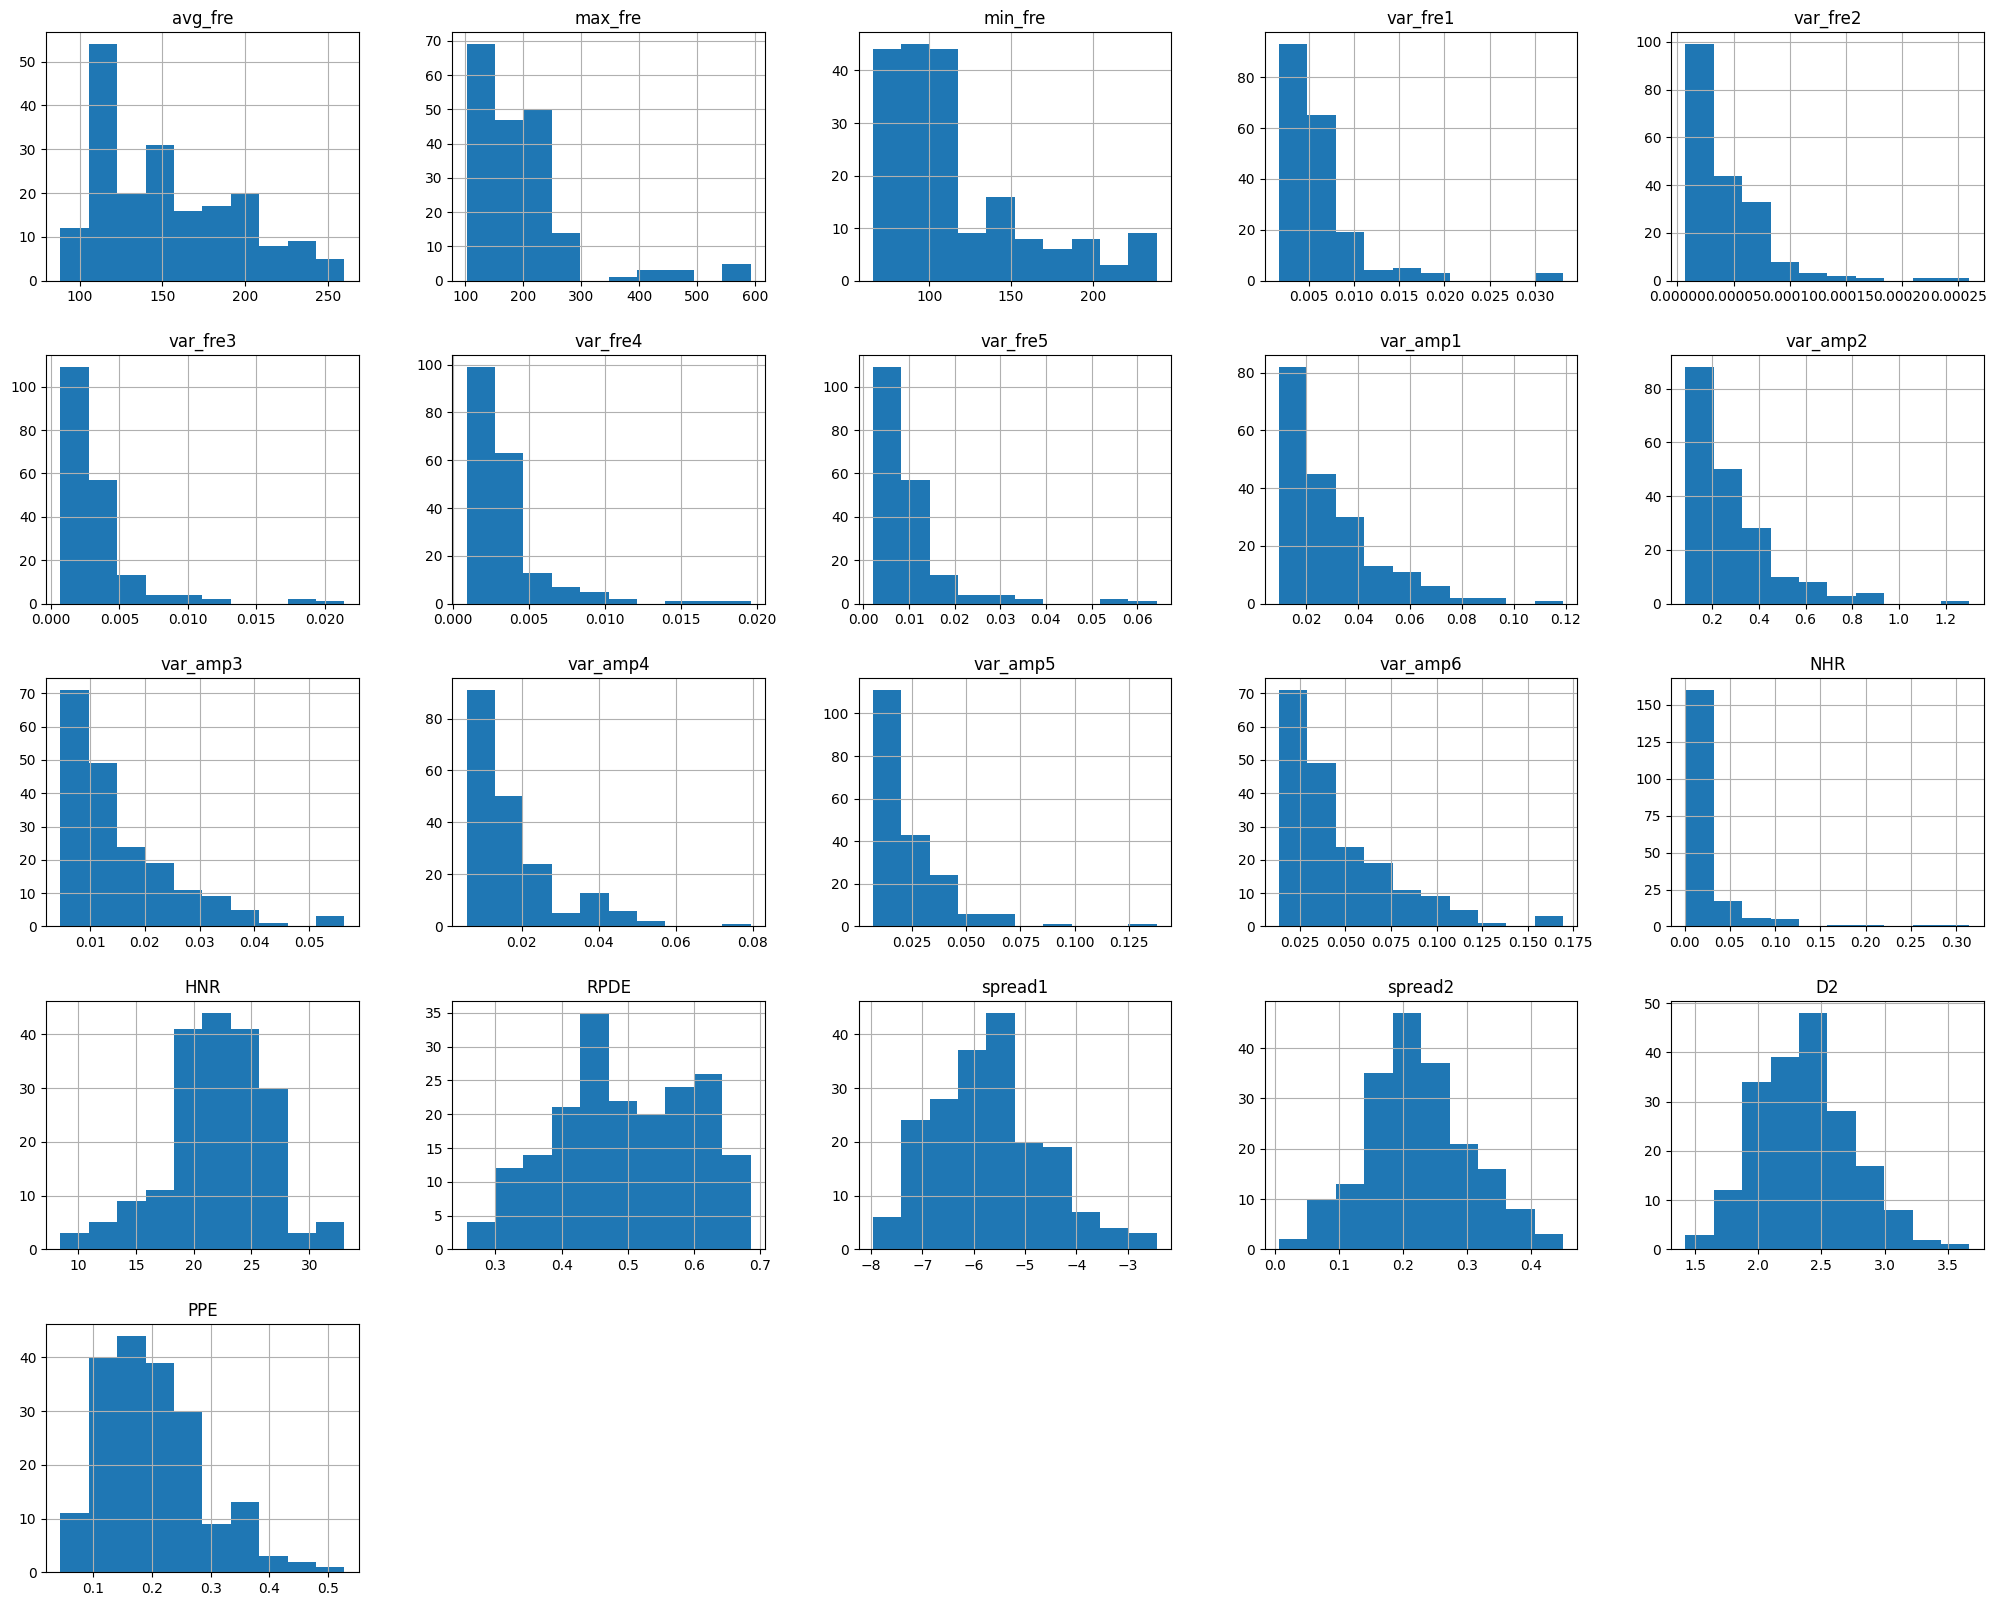

In [63]:
x1.hist(figsize=(25,20))
plt.show()

In [64]:
english_df=df[df.max_fre<=300]
english_df=english_df[english_df.var_fre1<=0.02]
english_df=english_df[english_df.var_fre2<=0.0001]
english_df=english_df[english_df.var_fre3<=0.01]
english_df=english_df[english_df.var_fre4<=0.01]
english_df=english_df[english_df.var_fre5<=0.02]
english_df=english_df[english_df.var_amp1<=0.10]
english_df=english_df[english_df.var_amp2<=1.0]
english_df=english_df[english_df.var_amp3<=0.04]
english_df=english_df[english_df.var_amp4<=0.050]
english_df=english_df[english_df.var_amp5<=0.075]
english_df=english_df[english_df.var_amp6<=0.125]
english_df=english_df[english_df.NHR<=0.15]

In [70]:
# english_df.drop(columns="name",axis=1,inplace=True)
english_df.drop(columns="Audio file", axis=1, inplace=True)
english_df.drop(columns="language",axis=1,inplace=True)

In [71]:
english_df.skew()

avg_fre     0.620669
max_fre     0.312547
min_fre     1.232013
var_fre1    0.855247
var_fre2    0.750365
var_fre3    0.820472
var_fre4    1.157688
var_fre5    0.820170
var_amp1    1.042745
var_amp2    1.105139
var_amp3    1.096833
var_amp4    1.358310
var_amp5    1.075428
var_amp6    1.096734
NHR         2.564618
HNR         0.076430
status     -1.039362
RPDE       -0.073768
spread1     0.311490
spread2     0.155273
D2          0.449731
PPE         0.561406
dtype: float64

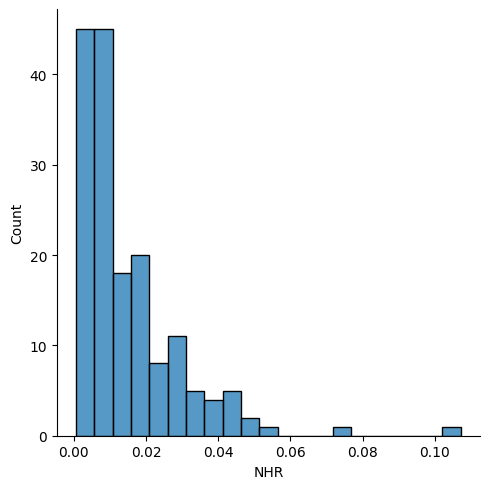

In [72]:
sns.displot(english_df['NHR'])

In [75]:
english_df=english_df[english_df.NHR<=0.06]
english_df.skew()

avg_fre     0.638245
max_fre     0.341186
min_fre     1.237060
var_fre1    0.694401
var_fre2    0.762319
var_fre3    0.805137
var_fre4    1.203286
var_fre5    0.804453
var_amp1    1.059663
var_amp2    1.131106
var_amp3    1.114687
var_amp4    1.380531
var_amp5    1.091207
var_amp6    1.114593
NHR         1.320002
HNR         0.187444
status     -1.055595
RPDE       -0.073675
spread1     0.312654
spread2     0.136271
D2          0.207991
PPE         0.562921
dtype: float64

# Correlation Matrix

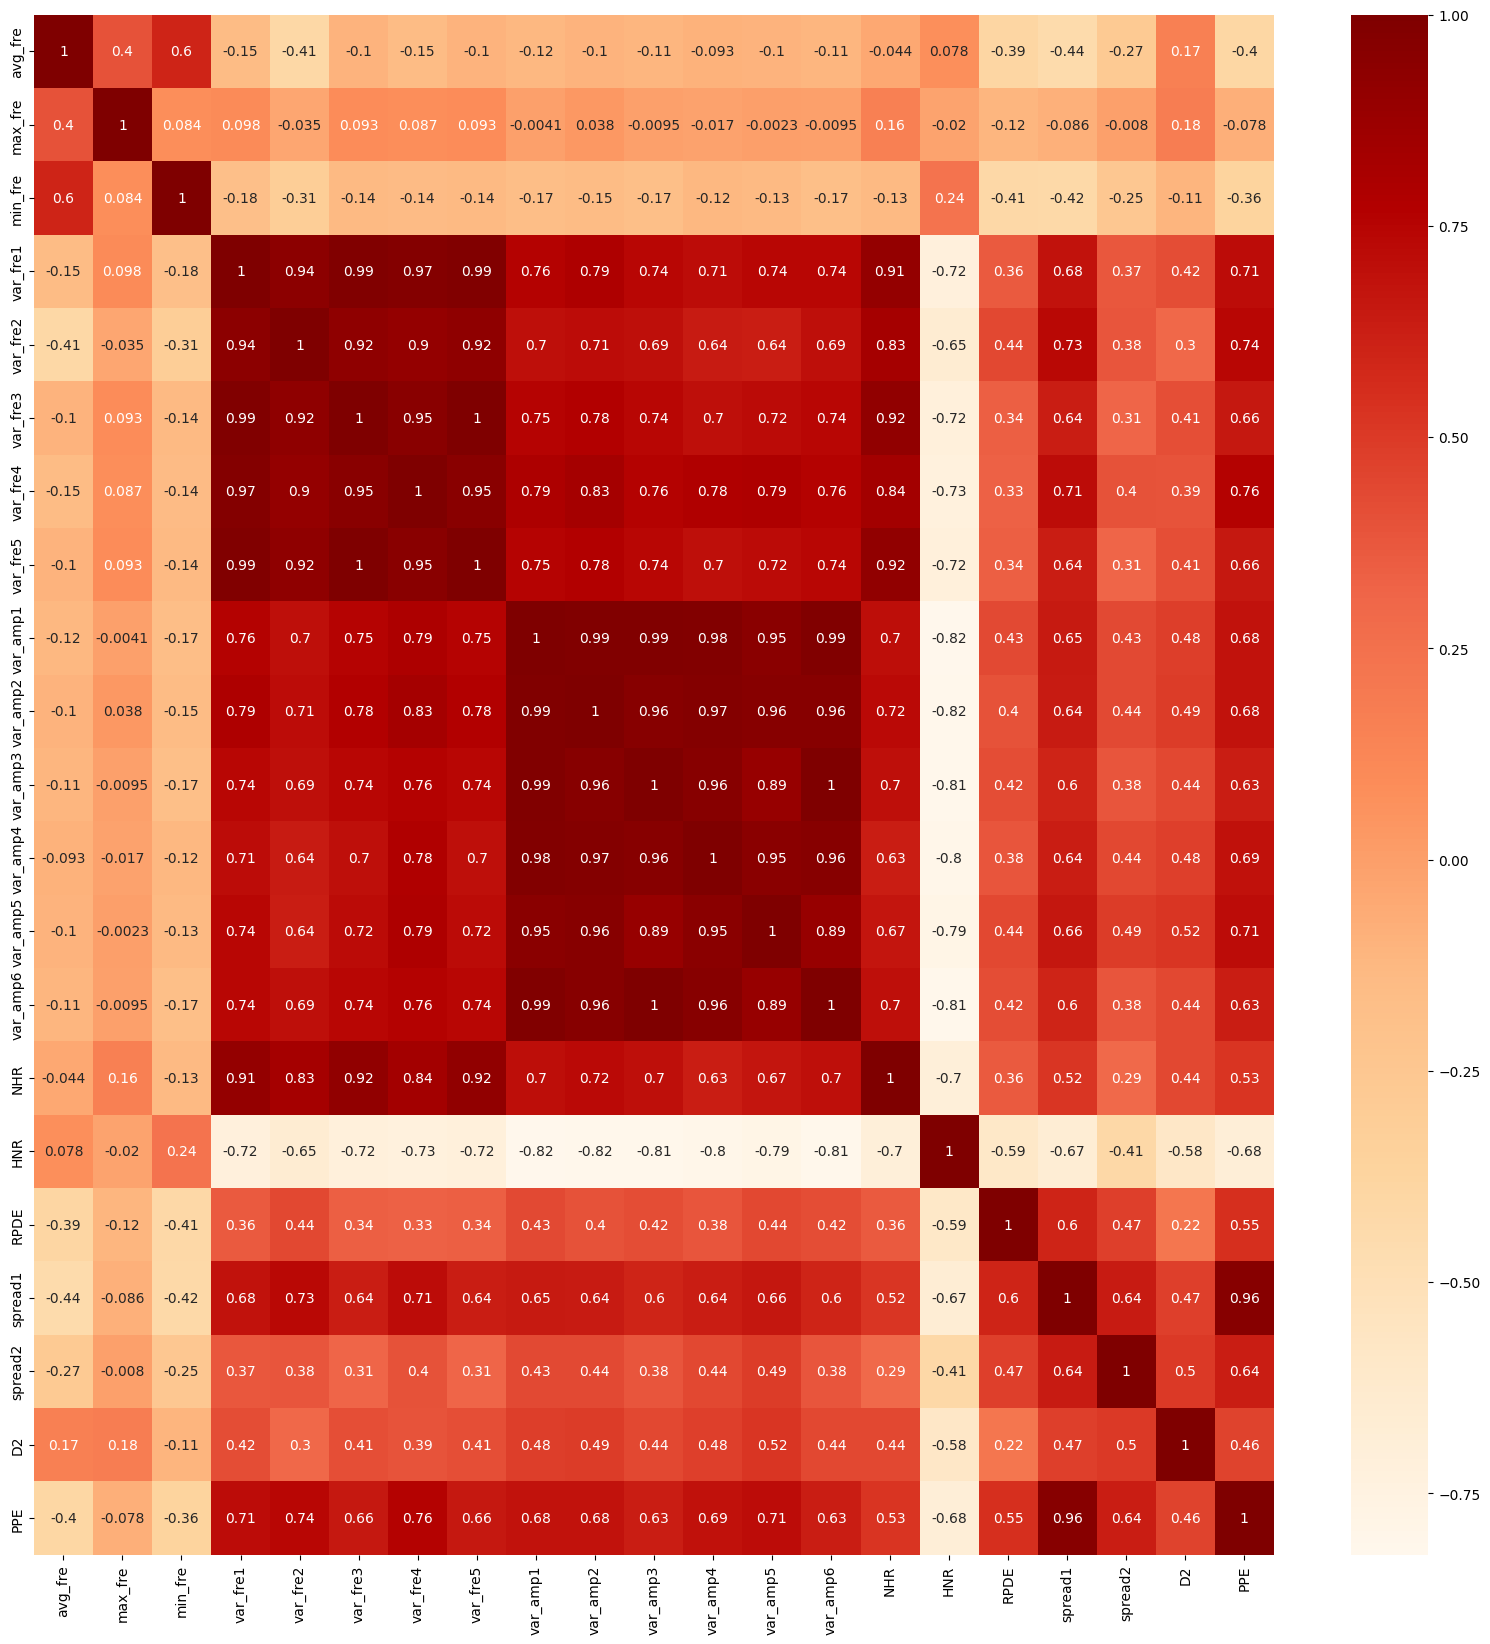

In [76]:
correl=x1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correl,annot=True,cmap='OrRd')
plt.show()

In [77]:
#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x1=scaler.fit_transform(x)
y1=y

In [78]:
#Split the dataset

xtrain,xtest,ytrain,ytest=train_test_split(x1, y1, test_size=0.2)

In [79]:
# Train the model
from xgboost import XGBClassifier


model=XGBClassifier()
model.fit(xtrain,ytrain)
predict=model.predict(xtest)


In [80]:
print(accuracy_score(ytest,predict)*100)

87.17948717948718


# Implementing Confusion Matrix

Text(0.5, 1.0, 'Output Confusion Matrix')

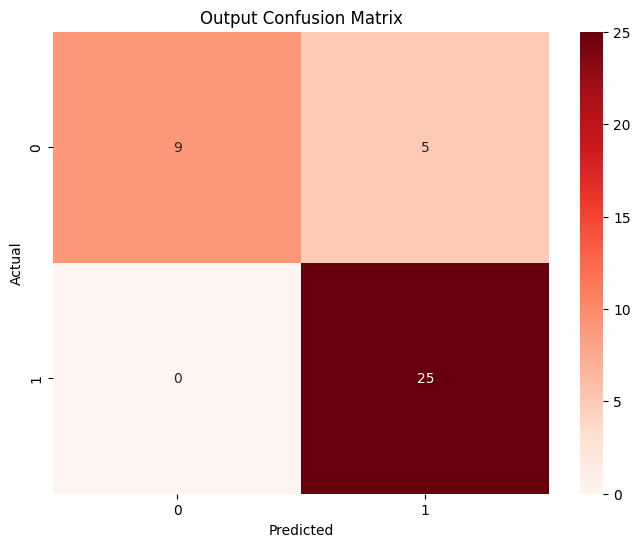

In [81]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,predict)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

# Output Display

In [82]:
pd.DataFrame({'actual':ytest,'predict':predict})

,actual,predict
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,1


# Prediction With New Input 

In [83]:
newinput=[[274.688,240.005,174.287,0.01360,0.01008,0.00624,0.00564,0.01873,1.02308,0.256,0.51268,0.01365,0.81667,0.63804,0.10715,6.883,0.607567,0.158453,3.679772,0.131728]]


In [84]:
output=model.predict(newinput)
output

array([1])